# Apresentação:

### BIBLIOGRAFIA UTILIZADA:
Montgomery, Douglas C. [et al.]. Introduction to linear regression analysis — 5.ed. — Neu Jersey : J. Wiley & Sons, 2012

In [100]:
library(knitr)

# Exemplo:

Deseja-se investigar a relação entre a variável percentual de crianças imunizadas contra difteria, coqueluche e
tétano e a variável mortalidade em 1000 nascidos vivos para um grupo de 8 países.

In [101]:
# Dados:
paises = c("Bolivia","Brasil","Camboja","Etiopia","Italia","Polonia","Senegal","Turquia")
imunizados = c(77,69,32,13,95,98,47,76)
mortalidade = c(118,65,184,208,10,16,145,87)

# Dataframe:
df1 = data.frame(paises, imunizados, mortalidade)

# Visualização do Dataframe:
knitr::kable(cbind(paises, imunizados, mortalidade), caption = "Porcentagem de Imunizados e Mortalidade em 1000 nascidos por país")



Table: Porcentagem de Imunizados e Mortalidade em 1000 nascidos por país

|paises  |imunizados |mortalidade |
|:-------|:----------|:-----------|
|Bolivia |77         |118         |
|Brasil  |69         |65          |
|Camboja |32         |184         |
|Etiopia |13         |208         |
|Italia  |95         |10          |
|Polonia |98         |16          |
|Senegal |47         |145         |
|Turquia |76         |87          |

Nota:

    Essa forma de visualização talvez seja mais útil em versões mais antigas do
    R, situações em que não se utilize a estrutura de notebook (Rmd - para o R),
    mas aqui, a simples chamada do dataframe já é um tipo de visualização mais
    útil, fácil e esteticamente mais agradável.

In [102]:
# DataFrame:
df1

paises,imunizados,mortalidade
<chr>,<dbl>,<dbl>
Bolivia,77,118
Brasil,69,65
Camboja,32,184
Etiopia,13,208
Italia,95,10
Polonia,98,16
Senegal,47,145
Turquia,76,87


## $(a)$ Usando um modelo de regressão linear simples, encontre a reta ajustada de mínimos quadrados.

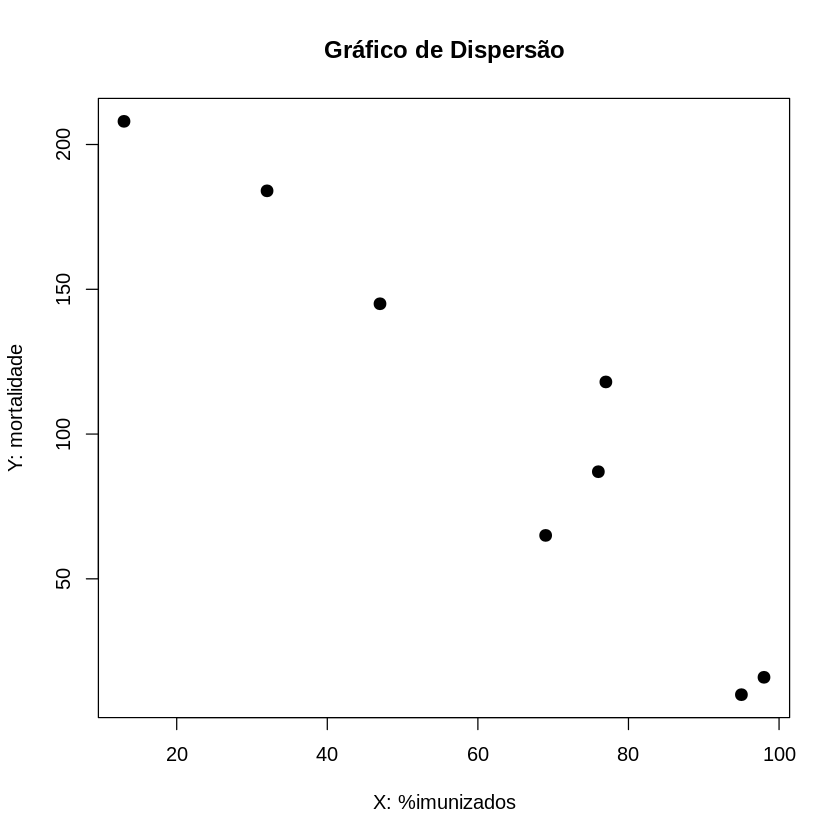

In [103]:
# Separando dados:
x = imunizados # variável regressora (covariável)
y = mortalidade # variável resposta

# Visualização dos Dados:
plot(x,y,xlab="X: %imunizados",ylab="Y: mortalidade",main="Gráfico de Dispersão",pch=20,lwd=3,cex=1.5)

Note como os dados se dispersão em todo de uma "_reta imaginária_", ou seja, é razoável pensar em um ajuste linear para os dados. O ajuste linear é sobre isso, achar a reta, ou, genralizando, o plano, que melhor ajusta os dados.

Como o caso em questão é uma **regressão simples**, utilizaremos aqui o comando `lsfit()` novamente para ajustar essa reta de regressão, ou seja, traremos essa "_reta imaginária_" que vemos para o mundo real.

[1] "Intercepto: 250.30"

[1] "Regressora: -2.31"

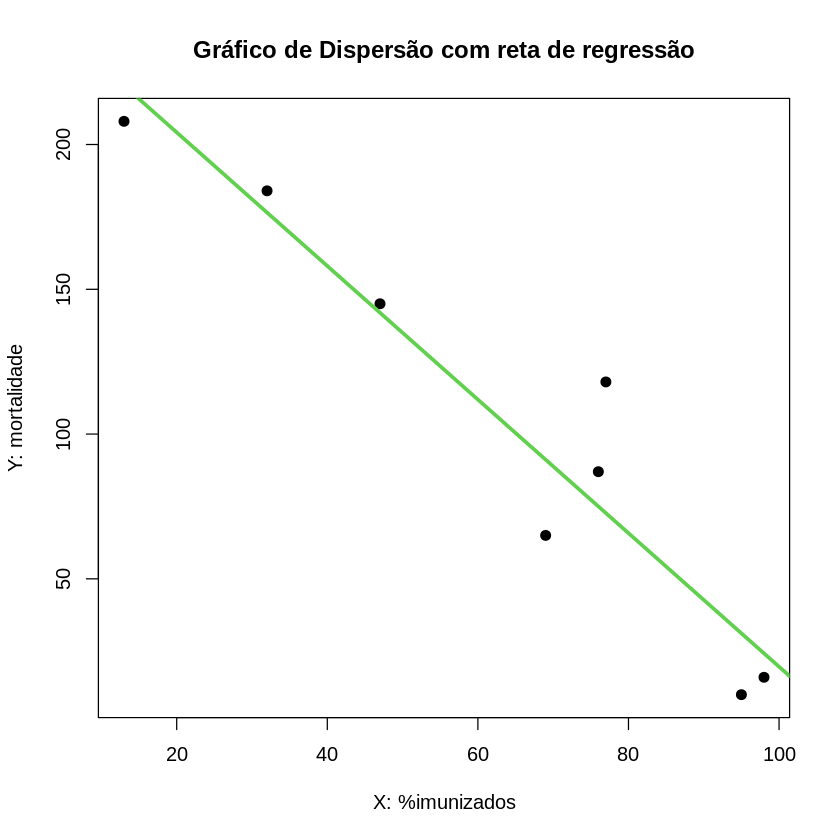

In [104]:
# Ajuste do MOdelo:
fit1 <- lsfit(x,y)

# Estimação:
beta_0_hat <- fit1$coef[[1]];sprintf('Intercepto: %.2f',beta_0_hat)
beta_1_hat <- fit1$coef[[2]];sprintf('Regressora: %.2f',beta_1_hat)

# Gráfico de Dispersão com a reta de regressão
plot(x, y, xlab = 'X: %imunizados', ylab = "Y: mortalidade",
     main = 'Gráfico de Dispersão com reta de regressão', pch = 20, lwd = 3, cex = 1.2)
abline(fit1$coef, lwd = 3, col = 3)

Provavelmente não tenha sido exatamente essa "_reta imaginária_" que você tenha visto, mas, dado o método e os dados, essa é a melhor reta possível. Essa reta possui dois elementos muito importantes, o **interceptor** e o **coeficiente angular**.

* **Interceptor:** É o valor estimado da média de $Y$ quando assumimos $x=0$, ou seja, se a porcentagem de imunizados é nula, a mortalidade será aproximadamente $250$ a cada $1000$ nascidos;

* **Coeficiente Angular:** Representa como a variável $x$ se relaciona com a variável $Y$, ou seja, estamos falando aqui sobre a **inclunição**, que indica o tipo de influencia que $x$ tem na resposta média de $Y$, positiva ou negativamente, e a **magnitude dessa inclinação**, se é muito ou pouca influencia de $x$ na resposta média de $Y$.

  Ou seja, para o caso em questão, a cada **acréscimo de uma unidade na porcentagem de imunizados**, representaria um **decréscimo** de quase $2.3$ na mortalidade esperada a cada $1000$ nascidos.

Interessante, não? A regressão linear não é só uma ferramenta de predição, mas também de inferência. Tendo as devidas ressalvas de que correlação não é causalidade e o entendimento que a base da regressão linear é a correlação, ainda que se use polinomios e etc... É possível realizar inferência com modelos tidos como "modelos de predição". É a tal da "Explicabilidade" que reclamam que se perde com a utilização de Redes Neurais. É com base na perda desse controle dos parâmetros que costuma-se comentar que redes neurais são "caixa preta".

## $(b)$ Calcule $\text{SS}_{\text{res}}$ e $\text{EP}(\hat{\beta}_0)$

### $\text{SS}_{\text{res}}$

Chegamos num tema importante para o ajuste do modelo, tendo em vista que a $\text{SS}_{\text{res}}$ é a nossa **função objetivo**, ou **função perda**, ou seja, é por essa função que encontramos as melhores estimações para os $\beta$'s. No ambito de regressão linear simples, sabemos que,

$$\text{SS}_{\text{Res}}=\sum_{i=1}^ne_{i}^2 =\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Ou seja, a ideia é checar o quanto o **valor predito** $\hat{y}_i$ se distância do **valor real** $y_i$, para cada amostra $i \in \mathbb{N}^*$. De modo que queremos que essa distância tenda a $zero$.

In [105]:
# Obtendo SSres:
SS_res <- sum(fit1$res^2);

sprintf('Soma dos resíduos dos quadrados dos erros: %.2f',SS_res)

[1] "Soma dos resíduos dos quadrados dos erros: 3614.55"

### $\text{EP}(\hat{\beta}_0)$

$\text{EP}$ é uma das nomenclaturas para **desvido padrão**. E sabemos que o **desvio padrão** se dá por $\sigma$ ou seja, a raiz **quadrada da variância**, de modo que $\text{EP}(\hat{\beta}_0) =\sqrt{\text{Var}(\hat{\beta}_0)}$. Se $\hat{\beta}_0 = \bar{y}-\hat{\beta}_1\bar{x}$, sabemos então que,

$$\text{Var}(\hat{\beta}_0) = \text{Var}(\bar{y}-\hat{\beta}_1\bar{x}) = \hat{\sigma}^2\left(\frac{1}{n}+\frac{\bar{x}^2}{S_{xx}}\right)$$

Sendo assim, temos então que,

$$\text{EP}(\hat{\beta}_0) = \sqrt{\hat{\sigma}^2\left(\frac{1}{n}+\frac{\bar{x}^2}{S_xx}\right)}$$

Porém, note que o $\hat{\sigma}^2$ é uma estimação. Sabemos que não é comum se saber a variância dos erros de um modelo de regressão linear, senda assim, essa variância precisa ser estimada. Deste modo, temos que a variância se da por,

$$\hat{\sigma}^2 = \text{MS}_{\text{Res}} = \frac{\text{SS}_{\text{res}}}{df}$$

Onde $df$ é o **grau de liberdade do modelo**, que é $n-2$, $n$ amostras e $2$ regressoras, contando com o intercepto, ou seja, analiticamente temos,

$$\text{EP}(\hat{\beta}_0) = \sqrt{\frac{\text{SS}_{\text{res}}}{n-2}\left(\frac{1}{n}+\frac{\bar{x}^2}{S_xx}\right)}$$

A título de aprendizado, vamos construir o código para realizar esses calculos, sem utilizar artifícios prontos para tal.

In [106]:
# Elementos:
n <- length(x) # Tamanho da amostra, (poderia ser de y também).
x_bar <- mean(x) # Npedua de x
S_xx  <- sum((x-x_bar)^2) # Soma dos quadrados dos resíduso de x
sigma_2_hat <- SS_res/(n-2) # Estimação da Variância

In [107]:
# Erro Padrão de Beta0
EP_beta0 = sqrt(sigma_2_hat*((1/n)+((x_bar^2)/S_xx)))
sprintf('Erro Padrão de Beta 0: %.2f', EP_beta0)

[1] "Erro Padrão de Beta 0: 21.34"

O “print” abaixo nos mostra várias informações e é bem útil na prática. Veja o valor abaixo de Std.Err na
linha **Intercept**, o mesmo que encontramos.

In [108]:
# Printando Modelo:
ls.print(fit1)

Residual Standard Error=24.5444
R-Square=0.9036
F-statistic (df=1, 6)=56.2199
p-value=3e-04

          Estimate Std.Err t-value Pr(>|t|)
Intercept 250.3043 21.3398 11.7294    0e+00
X          -2.3066  0.3076 -7.4980    3e-04




Note que a função `ls.print` também serve para obter o $\text{EP}(\hat{\beta}_1)$.

## $(c)$ Obtenha o intervalo de 99% confiança para $\beta_0$.

Além de obter a **estimação pontual**, também podemos obter o **intervalo de confiança** dessas estimações. Inclusive isso é uma boa prática no meio estatístico, que dá mais robusteza na estimação. O **intervalo de confiança** trata, dada uma taxa, do parâmetro estar naquele intervalo. De forma resumida, quanto mais próximo de 1 ou 100% a taxa e menor o intervalo, melhor.

Se os erros $\epsilon_i$ tiverem $\small \text{distribuição Normal}$, então a $\text{distribuição amostral}$ de $\frac{(\hat\beta_0 - \beta_0)}{\text{se}(\hat\beta_0)}$ e $\frac{(\hat\beta_1 - \beta_1)}{\text{se}(\hat\beta_1)}$ respeita a distribuição $\small \text{t-student}$ com $\small n-2$ graus de liberdade. Deste modo, podemos construir o **intervalo de confiança** de $\hat\beta_0$ como,

$$\hat\beta_0-t_{\alpha/2,n-2}*\text{se}(\hat\beta_0) \le \hat\beta_0 \le \hat\beta_0+t_{\alpha/2,n-2}*\text{se}(\hat\beta_0)$$

com $\small 100(1-\alpha)$% de **confiança**.

In [109]:
# Construindo intervalo:
alpha <-  0.01
t99 <- qt(1-alpha/2,n-2) # quantis da t de student com n-2 graus de liberdade

# Gerando intervalo:
IC <- c(beta_0_hat-t99*EP_beta0,beta_0_hat+t99*EP_beta0)


if  (beta_0_hat >= IC[1] &&  beta_0_hat <= IC[2]){
  print(sprintf('Intervalo de %.2f até %.2f',IC[1],IC[2]))
  print(sprintf('interceptor = %.2f, ou seja, está contido no intervalo! :>',beta_0_hat))
} else {
  print(sprintf('Intervalo de %.2f até %.2f',IC[1],IC[2]))
  print(sprintf('interceptor = %.2f, ou seja, não está contido no intervalo! :(',beta_0_hat))
}

[1] "Intervalo de 171.19 até 329.42"
[1] "interceptor = 250.30, ou seja, está contido no intervalo! :>"


**Importante**

Note que o **intervalo de confiança** de $\beta_0$ não contem o $\small zero$. Isso é um jeito alternativo de se checar a significância de um coeficiente como veremos na alternativa seguinte.

## $(d)$ A regressão é significativa? ($\small \alpha$ = 0.05)

Em estatística, estamos aqui falando de **teste de hipótese**, cuja definiriamos como sendo,

$$
\begin{cases}
H_0: \hat\beta_j=0 \\
H_1: \hat\beta_j \neq 0
\end{cases}
$$

Ou seja, estamos fazendo a pergunta: o coeficiente da variável regressora é significante, ainda mais, a variável
tem associação com a variável resposta? No entanto, não usaremos Testes de Hipóteses para respondê-la.

Utilizaremos intervalos de confiança de $\small 95$% para o coeficiente $\beta_1$. Assim, se 0 estiver contido nesse intervalo,
podemos afirmar, estatisticamente, que $\beta_1 = 0$ com $\small 95$%  de nível de confiança.

A forma de se calcular o intervalo de confiança do $\beta_1$ é igual ao $\beta_0$, só precisamos calcular o $\small \text{EP}(\hat\beta_1)$ que se dá por,

$$\text{Var}(\hat\beta_1)= \frac{\sigma^2}{\text{S}_{\text{xx}}}$$

ou seja, sabendo que $\hat{\sigma}^2=\text{MS}_{\text{Res}}$ então,

$$\text{EP}(\hat\beta_1) = \sqrt{\frac{\text{MS}_{\text{Res}}}{\text{S}_{\text{xx}}}}$$



In [110]:
# Estimando Erro Padrão:
EP_beta1 <- sigma_2_hat/S_xx

In [111]:
# Construindo intervalo:
alpha <-  0.01
t99 <- qt(1-alpha/2,n-2) # quantis da t de student com n-2 graus de liberdade

# Gerando intervalo:
IC <- c(beta_1_hat-t99*EP_beta1,beta_1_hat+t99*EP_beta1)


if  (beta_1_hat >= IC[1] &&  beta_1_hat <= IC[2]){
  print(sprintf('Intervalo de %.2f até %.2f',IC[1],IC[2]))
  print(sprintf('interceptor = %.2f, ou seja, está contido no intervalo! :>',beta_1_hat))
} else {
  print(sprintf('Intervalo de %.2f até %.2f',IC[1],IC[2]))
  print(sprintf('interceptor = %.2f, ou seja, não está contido no intervalo! :(',beta_1_hat))
}

[1] "Intervalo de -2.66 até -1.96"
[1] "interceptor = -2.31, ou seja, está contido no intervalo! :>"


Assim como no caso do $\beta_0$, podemos afirmar que regressão é significativa, pois o valor $\small zero$ não pertence ao IC de 95%, ou seja, há uma
relação linear entre % Imunizados e Mortalidade **estatisticamente significativa**.

## $(e)$ Previsão fora dos Dados (Argentina), Estimação Intervalar da Resposta Média e Observações Futuras

Temos que a Argentina possui um percentual de imunizados de $\small 73$%. Qual a mortalidade esperada em $\small 1000$
nascidos deste país? Vamos obter também um intervalo de $\small 99$% de confiança, agora para a predição!

In [112]:
x0 = 73
y0 = beta_0_hat+beta_1_hat*x0

sprintf('Dado a entrada %i%%, o valor médio da resposta é de %.2f em 1000 nascidos',x0,y0)

[1] "Dado a entrada 73%, o valor médio da resposta é de 81.92 em 1000 nascidos"

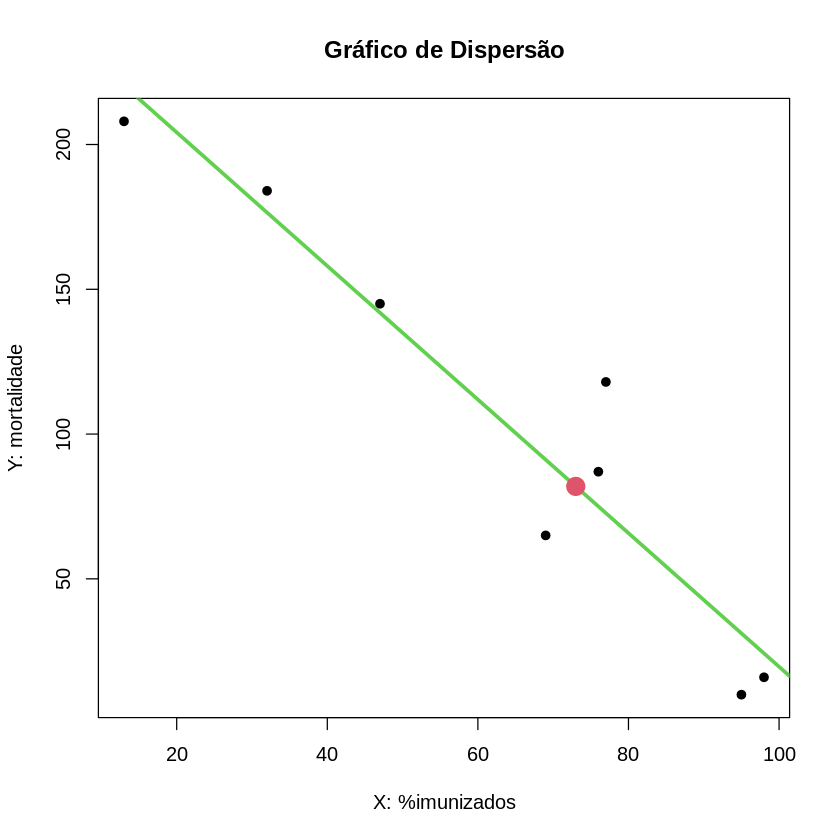

In [113]:
plot(x,y,xlab="X: %imunizados",ylab="Y: mortalidade",main="Gráfico de Dispersão",pch=20,lwd=3,cex=1)
abline(fit1$coef,lwd=3,col=3)
points(x0,y0,col=2,cex=3,pch=20)

### Estimação Intervalar da Resposta Média e Observações Futuras

Como já dito antes, o diferêncial desses modelos de aprendizado estatístico, sobretudo modelos lineares, é o controle de todo o processo, isso significa a capacidade não só de prever, mas também de estimar com o modelo.

Quando usamos o modelo para predição, isso é uma resposta média de $y_i$ dado um valor particular da variável $x_i$, ou seja, $\text{E}(y_i|x_i)$. Só que esse predição é uma estimativa pontual, como $\beta_0$


$$\widehat{\text{E}(y|x_0)} = \hat{\mu}_{y|x_0} = \hat{\beta}_0+\hat{\beta_1}x_0$$

Dado que os erros sejam **independentes** e $\epsilon \sim N(0,\sigma^2)$, e sendo o modelo **homocedastico**, temos então que o **intervalo de confiança** se dá por,

$$\left(\hat{\mu}_{y|x_0}-t_{\alpha/2,n-2}\sqrt{\text{MS}_{\text{Res}}\left(\frac{1}{n}+\frac{(x_0 - \bar{x})^2}{\text{S}_{\text{xx}}}\right)} , \hat{\mu}_{y|x_0}+t_{\alpha/2,n-2}\sqrt{\text{MS}_{\text{Res}}\left(\frac{1}{n}+\frac{(x_0 - \bar{x})^2}{\text{S}_{\text{xx}}}\right)}\right)$$

In [122]:
# erro padrão da média dado x0
EP.media <- sqrt(sigma_2_hat*(1/n + (x0 - x_bar)^2/S_xx))

# limites inf e sup do intervalo
LI.media <- y0 - t99*EP.media
LS.media <- y0 + t99*EP.media

sprintf('Intervalo de confiança: [%.2f, %.2f]',LI.media,LS.media)
sprintf('Predição: %.2f', y0)

[1] "Intervalo de confiança: [47.93, 115.92]"

[1] "Predição: 81.92"

## Gráficos com Estimativas Pontuais e Intervalar de $\small 99$%

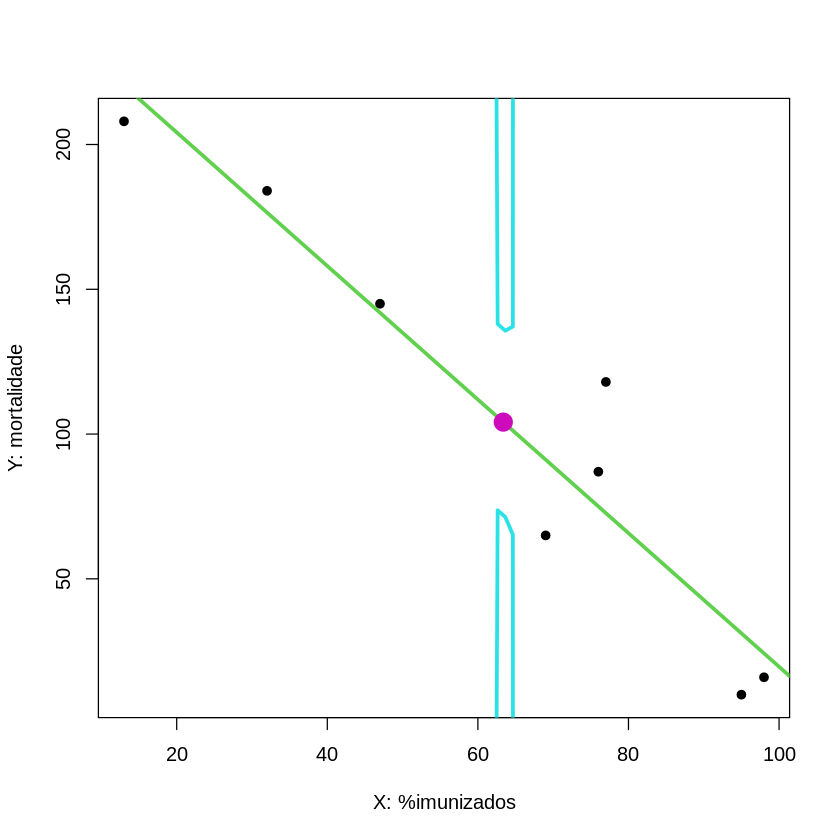

In [134]:
# Valores:
x.aux = seq(0,100,length=100)
reta0 = beta_0_hat+beta_1_hat*x.aux
EP.media = sqrt(sigma_2_hat*(1/n + (x.aux - x_bar)^22/S_xx))
LI.media = reta0 - t99*EP.media
LS.media = reta0 + t99*EP.media

# Gráfico de Dispersão:
plot(x,y,xlab="X: %imunizados",ylab="Y: mortalidade",main="",pch=20,lwd=3,cex=1)
abline(fit1$coef,lwd=3,col=3)
lines(x.aux,LI.media,col=5,lwd=3)
lines(x.aux,LS.media,col=5,lwd=3)
points(mean(x),mean(y),pch=20,cex=3,col=6)

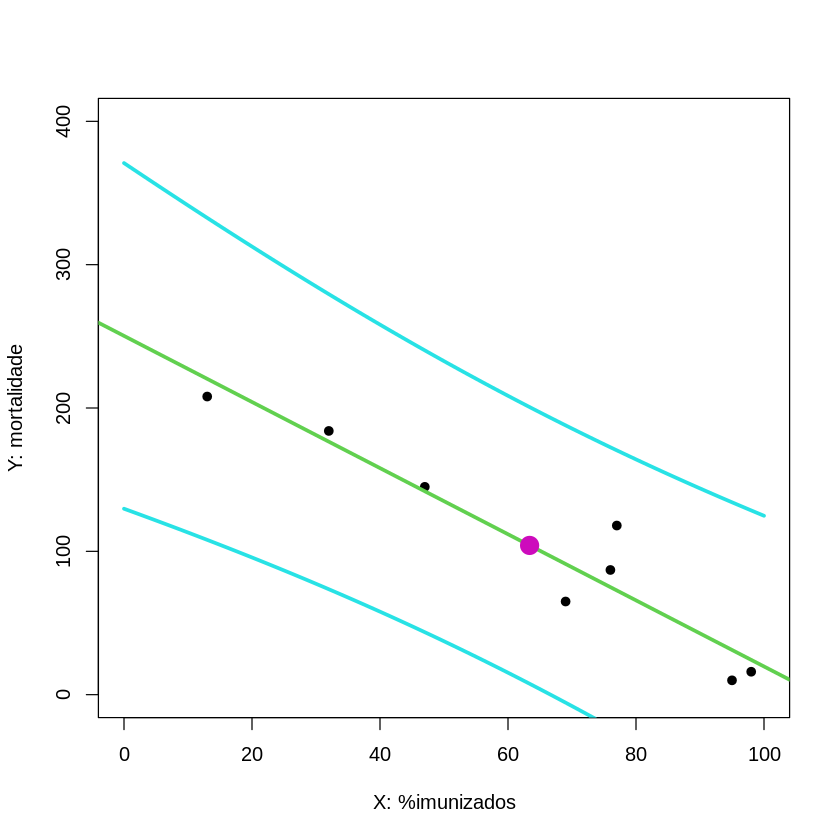

In [133]:
# Valores:
x.aux = seq(0,100,length=100)
reta0 = beta_0_hat+beta_1_hat*x.aux
EP.new = sqrt(sigma_2_hat*(1 + 1/n + (x.aux - x_bar)^2/S_xx))
LI.new = reta0 - t99*EP.new
LS.new = reta0 + t99*EP.new

# Visualização:
plot(x,y,
xlab="X: %imunizados",
ylab="Y: mortalidade",
main=" ",
xlim = c(0,100),
ylim = c(0,400),
pch=20,
lwd=3,
cex=1)
abline(fit1$coef,lwd=3,col=3)
lines(x.aux,LI.new,col=5,lwd=3)
lines(x.aux,LS.new,col=5,lwd=3)
points(mean(x),mean(y),pch=20,cex=3,col=6)